In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [56]:
def get_stock_data(ticker, datapath="data/prices/"):
    return pd.read_pickle(datapath+ticker+".pkl", )

In [57]:
def get_correlated_assets(tickers):
    pass

In [ ]:
def get_macroeconomic_indicators():
    pass

In [129]:
def get_technical_indicators(raw_df, v="Close"):
    
    df = pd.DataFrame()
    df[v] = raw_df[v]
    
    # Create 7 and 21 days Moving Average
    df['MA7'] = df[v].rolling(window=7).mean()
    df['MA21'] = df[v].rolling(window=21).mean()

    # Create MACD
    df['EMA26'] = df[v].ewm(span=26).mean()
    df['EMA12'] = df[v].ewm(span=12).mean()
    df['MACD'] = (df[v] - df[v])

    # Create Bollinger Bands
    df['SD20'] = df[v].rolling(window=20).std()
    df['UPPER_BAND'] = df[v] + (df['SD20'] * 2)
    df['LOWER_BAND'] = df[v] - (df['SD20'] * 2)

    # Create Exponential moving average
    df['EMA'] = df[v].ewm(com=0.5).mean()
    
    # RSI
    
    # Stochastic Oscillator
    
    
    df.drop(v, axis=1, inplace=True)
    return df

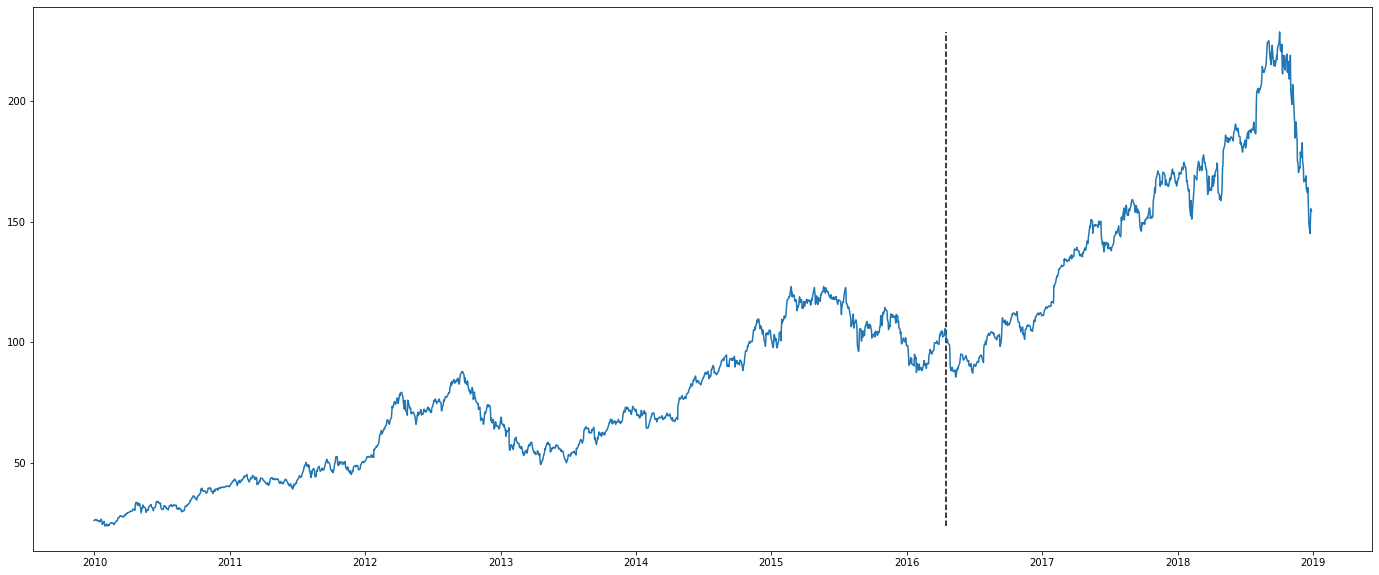

In [130]:
df = get_stock_data("AAPL")
# print(df.tail(10).to_string())

fig = plt.figure(figsize=[24,10])
ax = fig.subplots()
ax.plot(df['Close'])

test_start_dt = df.index.min()+(df.index.max()-df.index.min())*0.7 #using 0.7 train test split
test_start_dt = datetime.datetime(*dt.timetuple()[:3])
ax.vlines(test_start_dt, df['Close'].min(), df['Close'].max(), ls='--')

train_df = df.iloc[0:int(0.7*len(df))].copy()

In [134]:
ta_df = get_technical_indicators(train_df)
print(ta_df.tail(10).to_string())

                   MA7        MA21       EMA26       EMA12  MACD      SD20  UPPER_BAND  LOWER_BAND         EMA
Date                                                                                                          
2016-04-05  102.628815   99.576902   99.142032  101.652118   0.0  2.916539  109.314065   97.647910  103.735672
2016-04-06  103.405588   99.984810   99.543710  102.100205   0.0  2.898940  110.362563   98.766801  104.288345
2016-04-07  103.521364  100.321817   99.746707  102.128507   0.0  2.686723  107.657617   96.910727  102.952230
2016-04-08  103.400205  100.660170   99.943045  102.169855   0.0  2.412558  107.222385   97.572155  102.582257
2016-04-11  103.404245  101.012436  100.149969  102.257034   0.0  2.188990  107.114499   98.358538  102.685098
2016-04-12  103.464827  101.379509  100.440689  102.536673   0.0  1.984080  108.042844  100.106524  103.611489
2016-04-13  103.588683  101.806715  100.821561  103.005256   0.0  2.034492  109.651451  101.513482  104.925474
2

In [164]:
def get_fourier_transforms(raw_df, v="Close"):
    
    data_FT = pd.DataFrame()
    data_FT[v] = raw_df[v]
    
    close_fft = np.fft.fft(np.asarray(data_FT[v].tolist()))
    fft_df = pd.DataFrame({'fft':close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
    plt.figure(figsize=(14, 7), dpi=100)
    fft_list = np.asarray(fft_df['fft'].tolist())
    plt.plot(data_FT.index, data_FT[v],  label='Real', alpha=0.1)
    for num_ in range(1, 6):
        num_ = 4**num_
        fft_list_m10= np.copy(fft_list)
        fft_list_m10[num_:-num_]=0
        plt.plot(data_FT.index, np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_), alpha=0.2)

    plt.legend()
    plt.show()
    pass

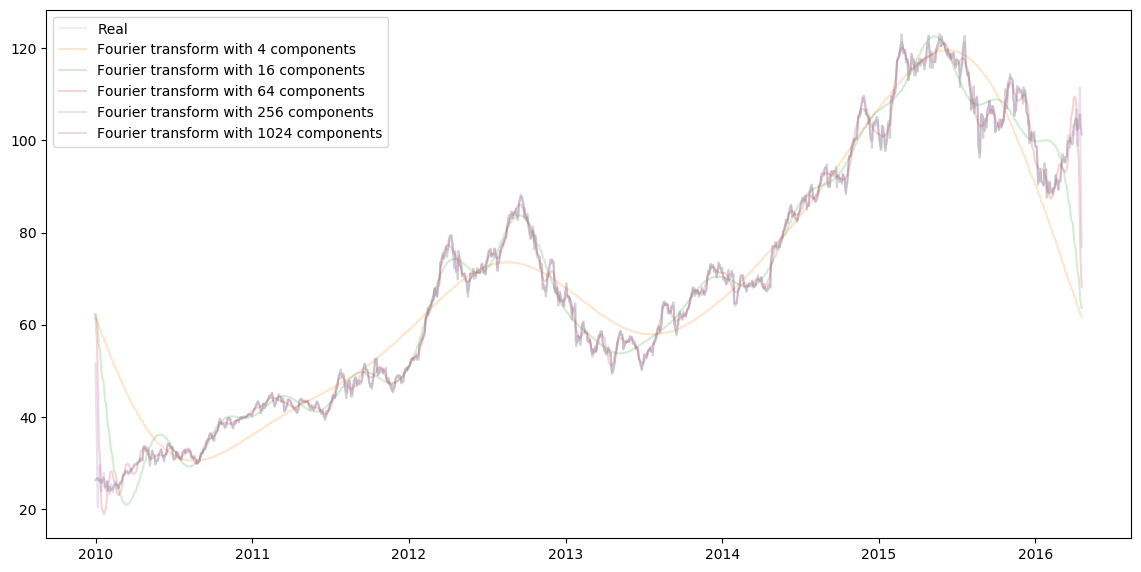

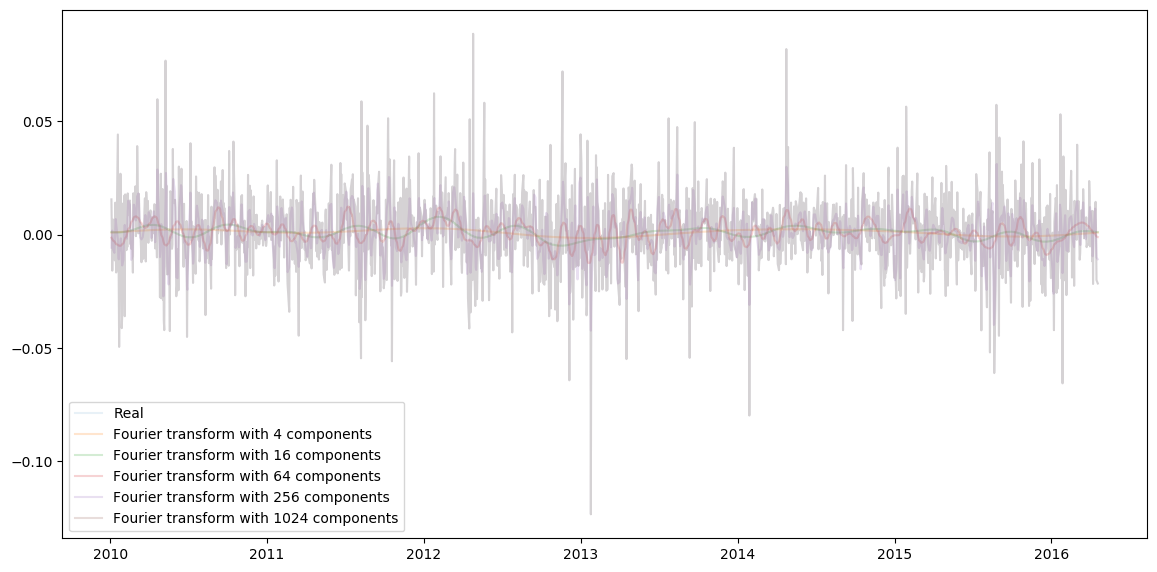

In [167]:
get_fourier_transforms(train_df)
fd_train_df = pd.DataFrame() 
fd_train_df['Close'] = train_df['Close']/train_df['Close'].shift(1) - 1
fd_train_df['Close'].dropna(inplace=True)
get_fourier_transforms(fd_train_df)

In [ ]:
def get_ARIMA(df, v="Close"):
    from statsmodels.tsa.arima_model import ARIMA
    from pandas.plotting import autocorrelation_plot
    
    series = df[v]
    model = ARIMA(series, order=(5, 1, 0))
    model_fit = model.fit(disp=0)
    print(model_fit.summary())

    autocorrelation_plot(series)
    plt.figure(figsize=(10, 7), dpi=80)
    plt.show() 

    from sklearn.metrics import mean_squared_error
    X = series.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    
    plt.figure(figsize=(12, 6), dpi=100)
    plt.plot(test, label='Real')
    plt.plot(predictions, color='red', label='Predicted')
    plt.xlabel('Days')
    plt.ylabel('USD')
    plt.title('Figure 5: ARIMA model on GS stock')
    plt.legend()
    plt.show()
    pass

get_ARIMA(train_df)
# get_ARIMA(fd_train_df)

C:\Users\Junlin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Junlin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1583
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2547.176
Method:                       css-mle   S.D. of innovations              1.209
Date:                Sat, 21 Sep 2019   AIC                           5108.353
Time:                        18:16:06   BIC                           5145.922
Sample:                             1   HQIC                          5122.311
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0476      0.028      1.717      0.086      -0.007       0.102
ar.L1.D.Close    -0.0039      0.025     -0.157      0.876      -0.053       0.045
ar.L2.D.Close    -0.0354      0.025     

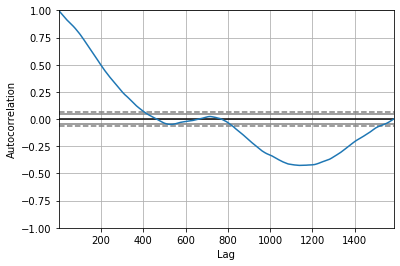

<Figure size 800x560 with 0 Axes>

In [181]:
df = train_df
v="Close"
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot

series = df[v]
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show() 

In [184]:
from sklearn.metrics import mean_squared_error
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat[0])
    obs = test[t]
    history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 2.474


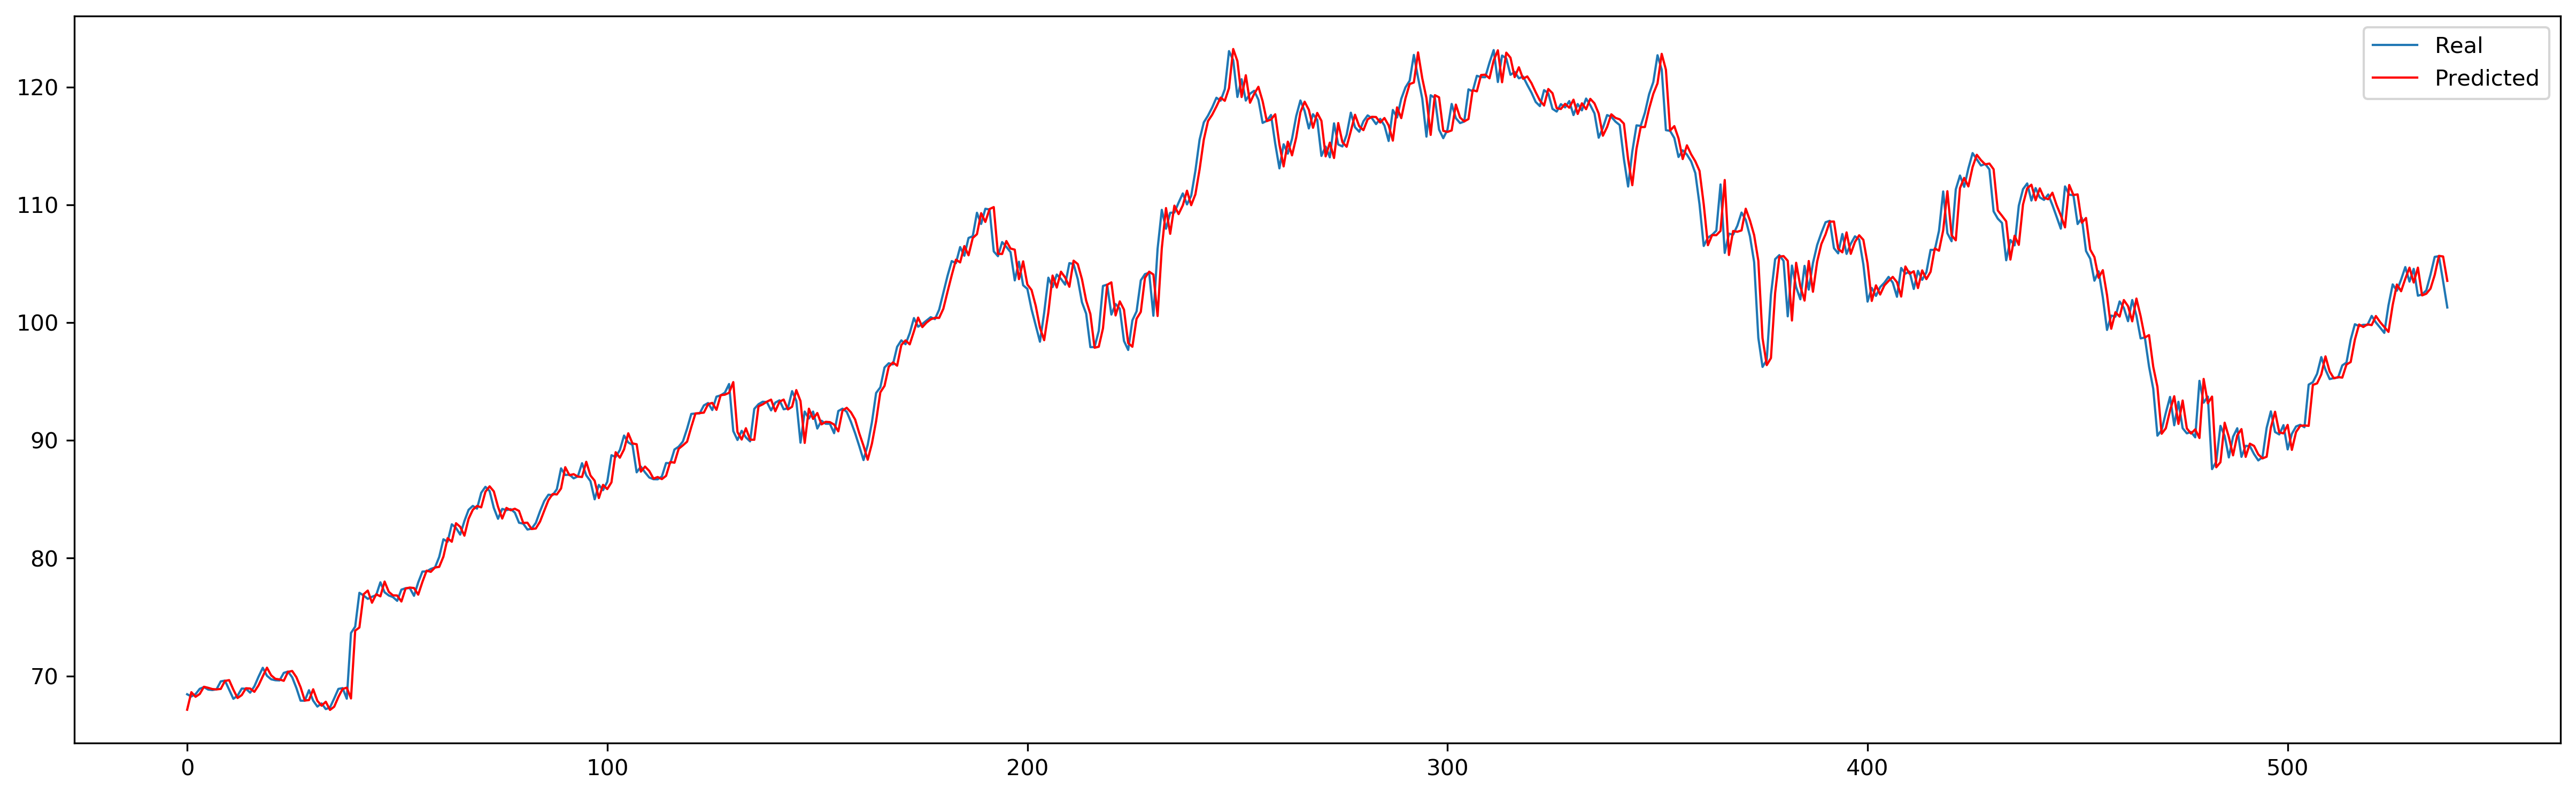

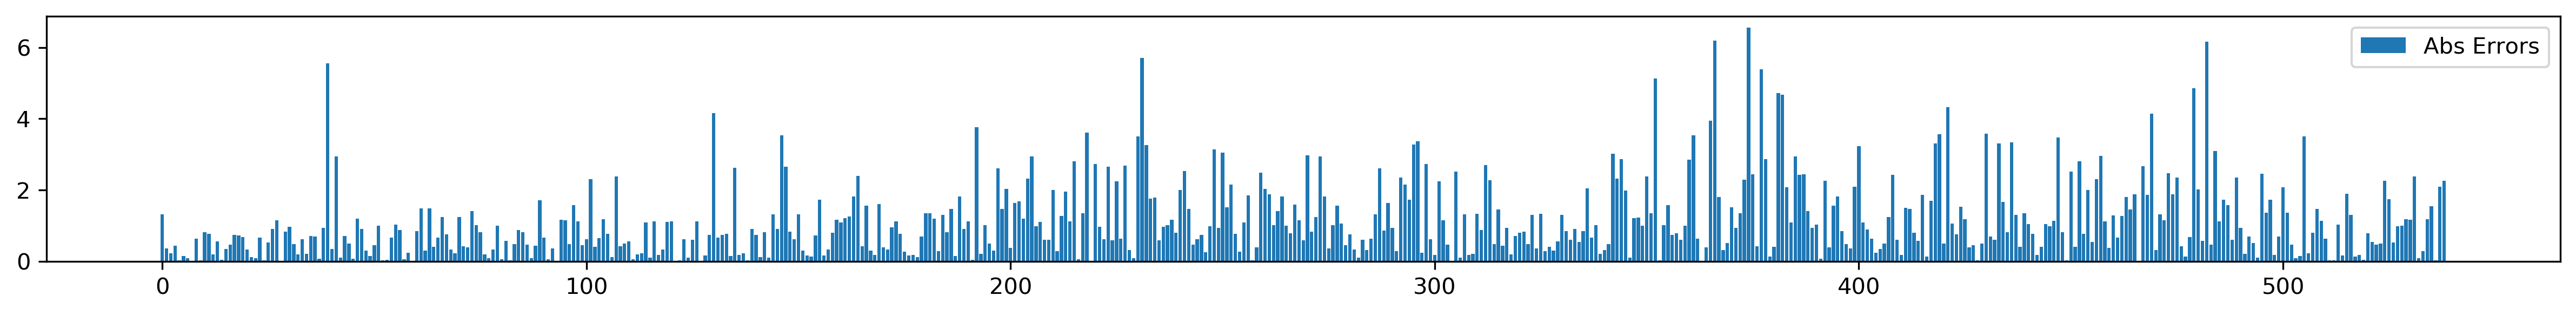

In [251]:
residuals = test-predictions
abs_errors = np.abs(residuals)
squared_errors = residuals**2

fig = plt.figure(figsize=[20,6], dpi=300)
ax = fig.subplots()
ax.plot(test, label='Real', lw=1)
ax.plot(predictions, color='red', label='Predicted',lw=1)
ax.legend()

fig2 = plt.figure(figsize=[20,2], dpi=300)
ax2 = fig2.subplots()
# ax2.bar(range(len(test)), squared_errors, label='Squared Errors')
ax2.bar(range(len(test)), abs_errors, label='Abs Errors')
ax2.legend()